Practice Session 5

In [1]:
import YData



#### Download Practice 5 Jupyter Notebook ####  
#YData.download_practice_code(5)              # Without answers. 
#YData.download_practice_code(5, True)        # With answers (won't work before Friday eve).




#### Download Data #### 
YData.download_data("data_science_salaries.csv")
YData.download_data("apple_2025.csv")
YData.download_data("google_2025.csv")
YData.download_data("woodard.csv")
YData.download_data("florida_guns_death.jpg")
YData.download_data("unemployment-chart-by-fox-news.jpg")



#### Import Packages ####  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



The next few cells contain some of the important functions/methods related to the Matplotlib and Seaborn packages.

### Matplotlib package 

In [ ]:
# Useful package to visualize the data. 

import matplotlib.pyplot as plt                     # For importing the package as "plt".
%matplotlib inline



# Pie Charts 
plt.pie(list_of_counts, labels = list_of_labels);   # list_of_counts is a list containing the counts
                                                    # and list_of_labels is the corresponding list with  
                                                    # labels associated with different counts. 


# Bar Graphs 
plt.bar(list_of_labels, list_of_counts);            # Notice the order for list_of_counts and 
                                                    # list_of_labels switches from above. 


# Histograms 
plt.hist(quant_variable, edgecolor = 'k', bins = n, alpha = 0.5, density = True, label = "my_label");
                                                    # quant_variable is the list containing the values 
                                                    # values of the Quantitative variable and "n" is
                                                    # the bin size.


# For plotting two quantitative variables. 
plt.plot(quant_1, quant_2, '.', label = "my_label")  
plt.scatter(quant_1, quant_2, color = "color_column") # for plotting quant_2 as a function of quant_1.                                               



# Some useful functions. (a and b are arbitrary/placeholder strings)
plt.xlabel("a");
plt.xticks(rotation = n);
plt.ylabel("b");
plt.legend();
plt.figure(figsize = (n, k));
plt.title("my_title");

# For subplots. 
plt.subplot(i,j,k);




# For image show (along with colorbar) where N is an ndarray (with appropriate dimension and entries).  
plt.imshow(N);
plt.colorbar();


# For Box Plot where N is an ndarray.  
plt.boxplot([N], labels = ["my_label"], showfliers = False);



### Seaborn Package

In [ ]:
# Import the package. 
import seaborn as sns

# Apply Seaborn's effects. Use the function sns.set_theme().
sns.set_theme(style = "whitegrid")



In [ ]:
# Useful when working with two quantitative variables.
# Basic syntax
sns.relplot(data = my_df, ....)

 

For mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [ ]:
# Useful when working with one quantiative variable. 
# Basic syntax
sns.displot(data = my_df, ....)

##### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


In [ ]:
# Useful when working with a categorical variable. 
# Basic syntax
sns.catplot(data = my_df,....)

##### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


<br>
<br>
<br>
<br>

# 1. Analyzing Two Quantitative Variables via "Pictures"

In [35]:
# Read the data "data_science_salaries.csv" as a Pandas DataFrame under the name "salaries_df".
salaries_df = pd.read_csv("data_science_salaries.csv")

In [36]:
# Display the shape and the first 3 rows of the DataFrame. 
display(salaries_df.head(3),salaries_df.shape)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium


(6599, 11)

In [37]:
# Extract salaries for those who worked On-site. 
# Store your Pandas Series under the name "on_site_salaries".
bool_mask = salaries_df["work_models"] == "On-site"   
on_site_salaries = salaries_df["salary_in_usd"][bool_mask]




# Extract salaries for those who DID NOT work On-site. 
# Store your Pandas Series under the name "off_site_salaries". 
off_site_salaries = salaries_df["salary_in_usd"][~bool_mask]




### A. Comparing On-site and Off-site Data Science Salaries via Box Plots

##### Now that we have the `on_site_salaries` and `off_site_salaries` Pandas Series, let's use side-by-side boxplots to compare the salaries (in USD).

##### Does it matter if you work on-site or off-site in Data Science jobs? 


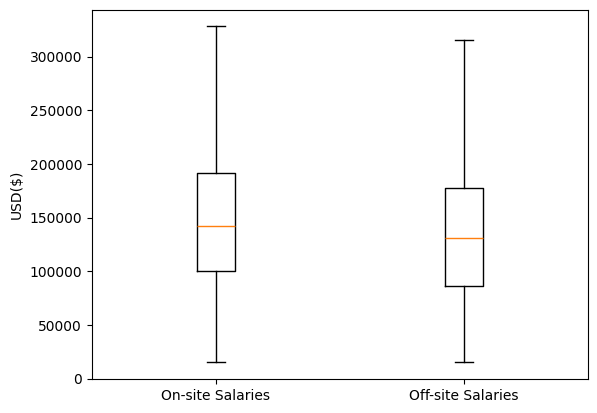

In [38]:
# Plot two box plots side by side such that the boxplot for on_site_salaries 
# is on the left to the boxplot for off_site_salaries. 
plt.boxplot([on_site_salaries, off_site_salaries], tick_labels = ["On-site Salaries", "Off-site Salaries"],
           showfliers = False 
           );
plt.ylabel("USD($)");





### B. Comparing On-site and Off-site Data Science Salaries via Histograms

We can also compare the salaries using overlapping histograms. To do this, it will be useful to set the following properties:

1. `alpha = .5`: Make the histograms have some transparency.
2. `density =  True`: Normalize the histograms to have a area equal to 1 to account for the fact that there are different numbers of on-site salaries and off-site salaries in our two Pandas Series.

Let us try to answer the same question using histograms:
Does it matter if you work-on site or off-site in Data Science jobs?


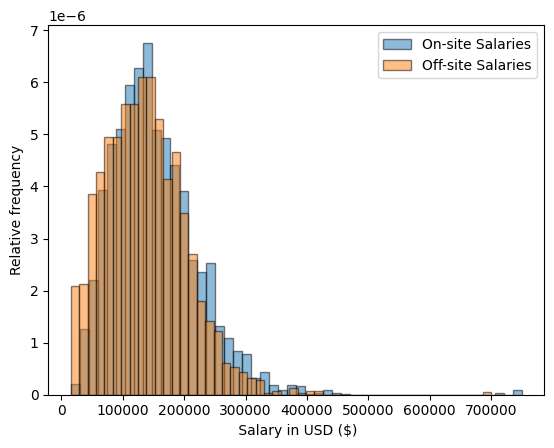

In [39]:
# Plot two overlapping histograms (one for on_site_salaries and the other for off_site_salaries).
plt.hist(on_site_salaries, edgecolor = "k", alpha = .5, label = "On-site Salaries", bins = 50, density= True);
plt.hist(off_site_salaries, edgecolor = "k", alpha = .5, label = "Off-site Salaries", bins = 50, density = True);
plt.legend();
plt.xlabel(" Salary in USD ($)");
plt.ylabel("Relative frequency");









# 2. Analyzing Two Time Series via "Pictures"

### Apple vs Google 
Let us analyse how Apple and Google stocks are doing this year 2025. 
Data Source: <https://www.marketwatch.com>

In [40]:
# Read data as Pandas DataFrame. 
apple_df = pd.read_csv("apple_2025.csv", parse_dates = [0])
google_df = pd.read_csv("google_2025.csv", parse_dates = [0])


In [41]:
# Reset index to Date. 
apple_df = apple_df.set_index("Date")
google_df = google_df.set_index("Date")


In [42]:
display(apple_df.head(3),google_df.head(3))

,Open,High,Low,Close,Volume
Date,,,,,
2025-09-30,254.86,255.92,253.11,254.63,"37,704,262"
2025-09-29,254.56,255.00,253.01,254.43,"40,127,688"
2025-09-26,254.10,257.60,253.78,255.46,"46,076,262"


,Open,High,Low,Close,Volume
Date,,,,,
2025-09-30,243.06,243.68,239.57,243.55,"22,541,189"
2025-09-29,248.28,251.65,243.20,244.36,"23,157,250"
2025-09-26,247.79,250.12,246.64,247.18,"16,594,609"


#### Time Series Plots 

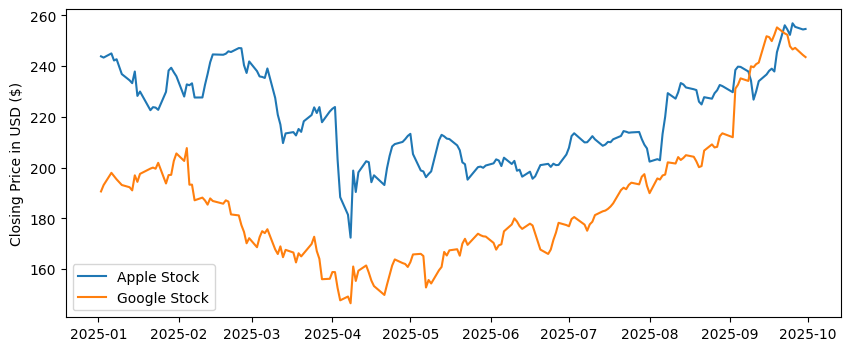

In [43]:
# Plot apple and google closing price time series on the same plot. 
plt.figure(figsize = (10, 4));
plt.plot(apple_df["Close"], label = "Apple Stock");
plt.plot(google_df["Close"], label = "Google Stock");
plt.ylabel("Closing Price in USD ($)");
plt.legend();






# 3. Analyzing Functional Relationship between Two Quantitative Variables via "Pictures"

In [44]:
nc_df = pd.read_csv("woodard.csv", index_col = "ID #")

In [45]:
# Removing outliers from the data. 
bool_cheap = nc_df["Total $"] < 4000000
nc_df = nc_df[bool_cheap]
nc_df.head()

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip
ID #,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604
3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610
4,1983,1152,1.0,0.68,2.0,0,131103,50000,81103,27616
6,1967,1752,1.0,0.29,1.5,1,144452,52000,92452,27604


###  Is it resonable to assume that as land size increases, property price increases as well?

#### A. Let us first check the above functional relationship via a scatter plot. 

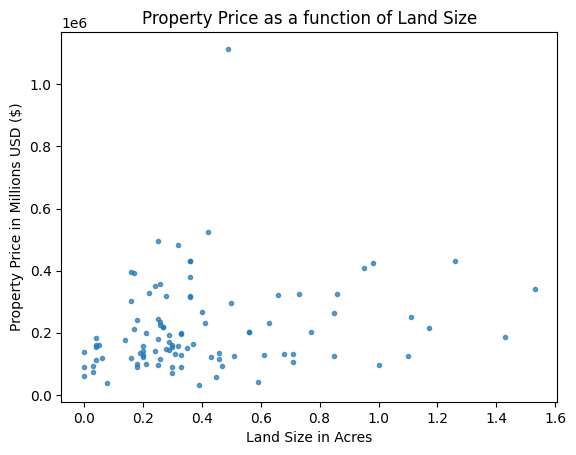

In [46]:
# Create a scatter (dot) plot of total property price as a function of land size. 
plt.plot(nc_df["Acres"], nc_df["Total $"], ".", alpha = 0.7);
plt.xlabel("Land Size in Acres");
plt.ylabel("Property Price in Millions USD ($)");
plt.title("Property Price as a function of Land Size");






#### B. Let us now construct a scatter plot so that properties with fireplaces are colored green and properties without fireplaces are colored red. 

In [47]:
# Creating a color column. 

# 1. Create a column with all red.
nc_df["fireplace"] = "red"


# 2. Construct an appropriate boolean mask. 
bool_fire = nc_df["Fireplaces"] >= 1


# 3. Change color for properties that have a fireplace from red to green.
nc_df.loc[bool_fire, "fireplace"] = "green"


# 4. Display first three rows of the new DataFrame.
nc_df.head(3)

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip,fireplace
ID #,,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603,green
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604,green
3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610,red


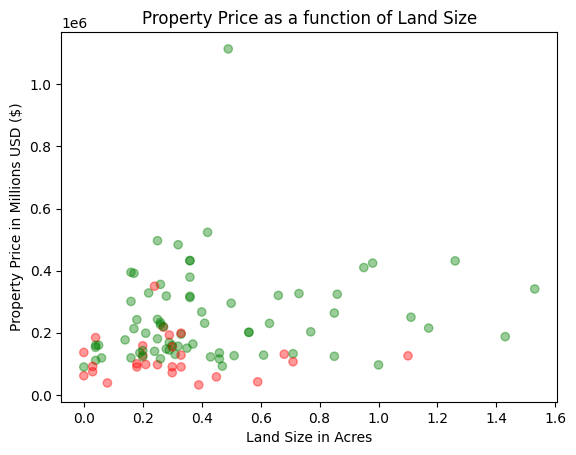

In [48]:
# Let us now construct a scatter plot so that properties with fireplaces are colored green and
# properties without fireplaces are colored red.
plt.scatter(nc_df["Acres"], nc_df["Total $"],
            color = nc_df["fireplace"],
            alpha = 0.4
            );
plt.xlabel("Land Size in Acres");
plt.ylabel("Property Price in Millions USD ($)");
plt.title("Property Price as a function of Land Size"); 












# 4. Subplots 

### A. via plyplot interface

In [49]:
# Recall nc_df DataFrame. 
nc_df.head(3)

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip,fireplace
ID #,,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603,green
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604,green
3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610,red


np.int64(72)

np.int64(27)

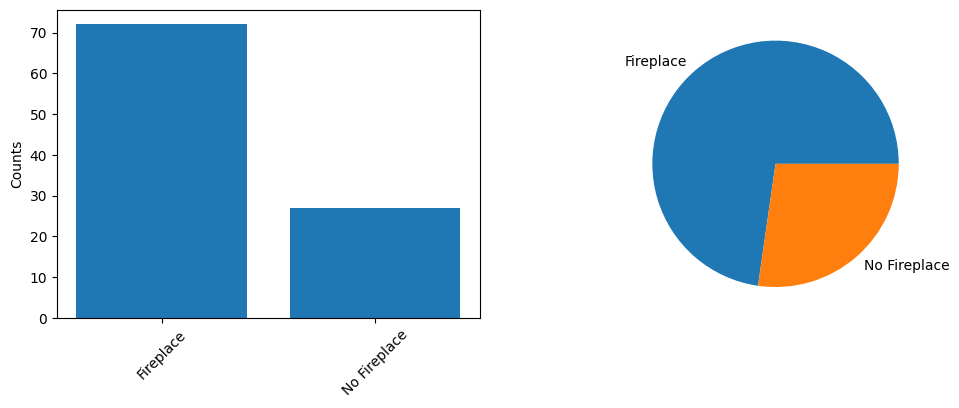

In [50]:
# Let us create a bar graph and a pie chart for the categorical variable Fireplaces. 
# Ensure the two pictures (plots) are side by side. 


# Count the number of properties with fireplaces and store the count as fireplace_count. 
fireplace_count = np.sum(nc_df["Fireplaces"] >= 1) 


# Count the number of properties without fireplaces and stoee the count as no_fireplace_count.
no_fireplace_count = np.sum(nc_df["Fireplaces"] == 0)


# Display fireplace_count and no_fireplace_count.
display(fireplace_count, no_fireplace_count)


# Change the figure size. (We need a longer canvas than the default one.)
plt.figure(figsize = (12, 4));


# First subplot (Bar Graph).
plt.subplot(1, 2, 1);
plt.bar(["Fireplace", "No Fireplace"], [fireplace_count, no_fireplace_count]); 
plt.xticks(rotation=45);
plt.ylabel("Counts");



# Second subplot (Pie Chart).
plt.subplot(1, 2, 2);
plt.pie([fireplace_count, no_fireplace_count], labels = ["Fireplace", "No Fireplace"]);



### B. via axes interface. 

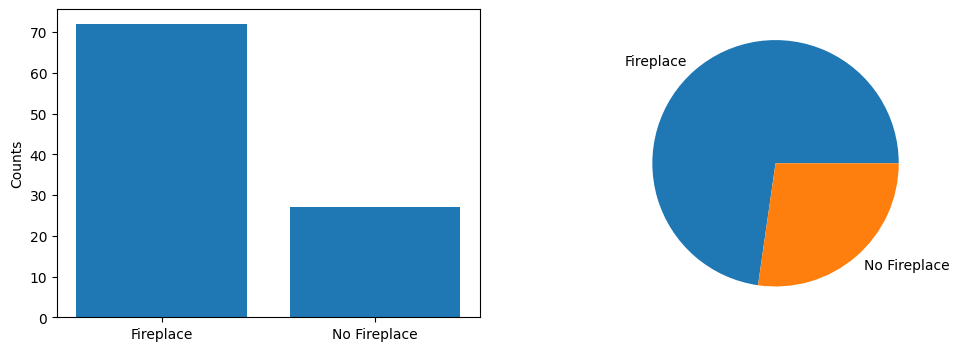

In [51]:
# Using the axes interface.


# Create a skeloton for two subplots. 
fig, ax = plt.subplots(1, 2);


# Set the figure size.
fig.set_size_inches(12, 4);

    
# First subplot (Pie Chart).
ax[0].bar(["Fireplace", "No Fireplace"], [fireplace_count, no_fireplace_count]); 
ax[0].set_ylabel("Counts");


# Second subplot (Pie Chart). 
ax[1].pie([fireplace_count, no_fireplace_count], labels = ["Fireplace", "No Fireplace"]);


# 5. Seaborn

In [52]:
import seaborn as sns   

###  Let us first create some of the pictures above using the Seaborn! 

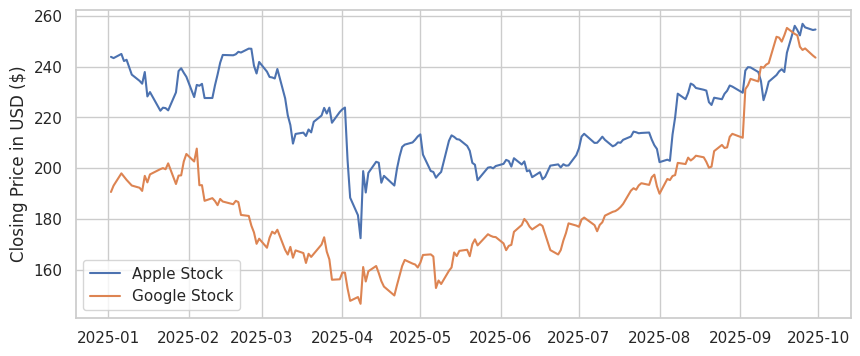

In [53]:
#### Apple vs Google using Seaborn ####

# Apply Seaborn's effects. Hint: Use the function sns.set_theme(style = "whitegrid").
sns.set_theme(style = "whitegrid")


# Copy and paste rest of the code from Question 2 above where you plot apple and google closing price time series on the same plot. 
plt.figure(figsize = (10, 4));
plt.plot(apple_df["Close"], label = "Apple Stock");
plt.plot(google_df["Close"], label = "Google Stock");
plt.ylabel("Closing Price in USD ($)")
plt.legend();





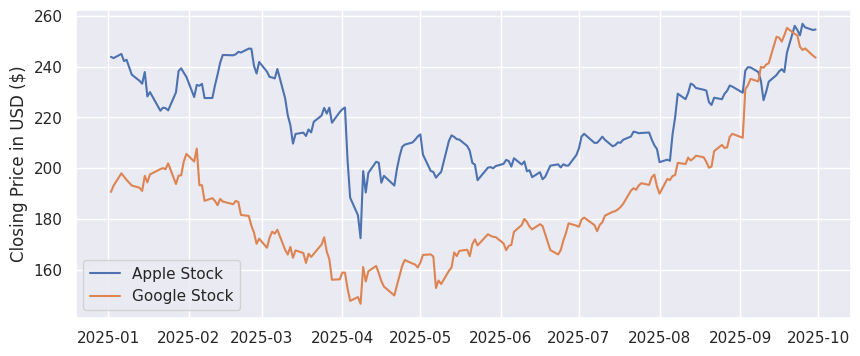

In [54]:
##### Apple vs Google using Seaborn ####

# Using seaborn's default theme. 
sns.set_theme()


# Copy and paste rest of the code from Question 2 above where you plot apple and google closing price time series on the same plot. 
plt.figure(figsize = (10, 4));
plt.plot(apple_df["Close"], label = "Apple Stock");
plt.plot(google_df["Close"], label = "Google Stock");
plt.ylabel("Closing Price in USD ($)")
plt.legend();





## The `sns.relplot()` function 

Analyzing two Quantitative variables via sns.relplot () function. 

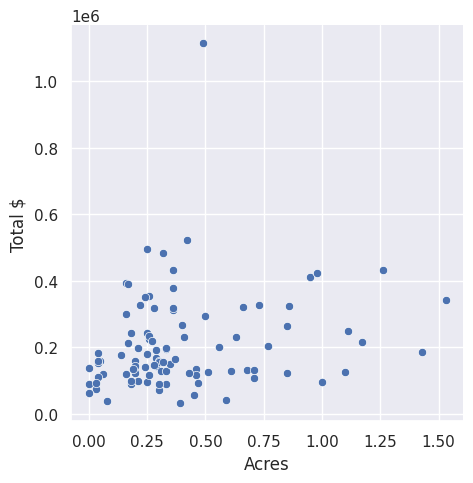

In [55]:
# Use relplot function in Seaborn package to recreate scatter (dot) plot of total property price as a function of land size. 
# That is recreate the plot from problem 3, part A above. 
sns.relplot(data = nc_df, x = "Acres", y = "Total $");
   




# Which syntax is easier? No need to give separate lables.
# Answer: 

#### Let us now use `sns.relplot()` function to create some more exotic plots. 



Let's continue to explore the relplot using data on North Carolina property prices. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [56]:
nc_df.head(2)

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip,fireplace
ID #,,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603,green
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604,green


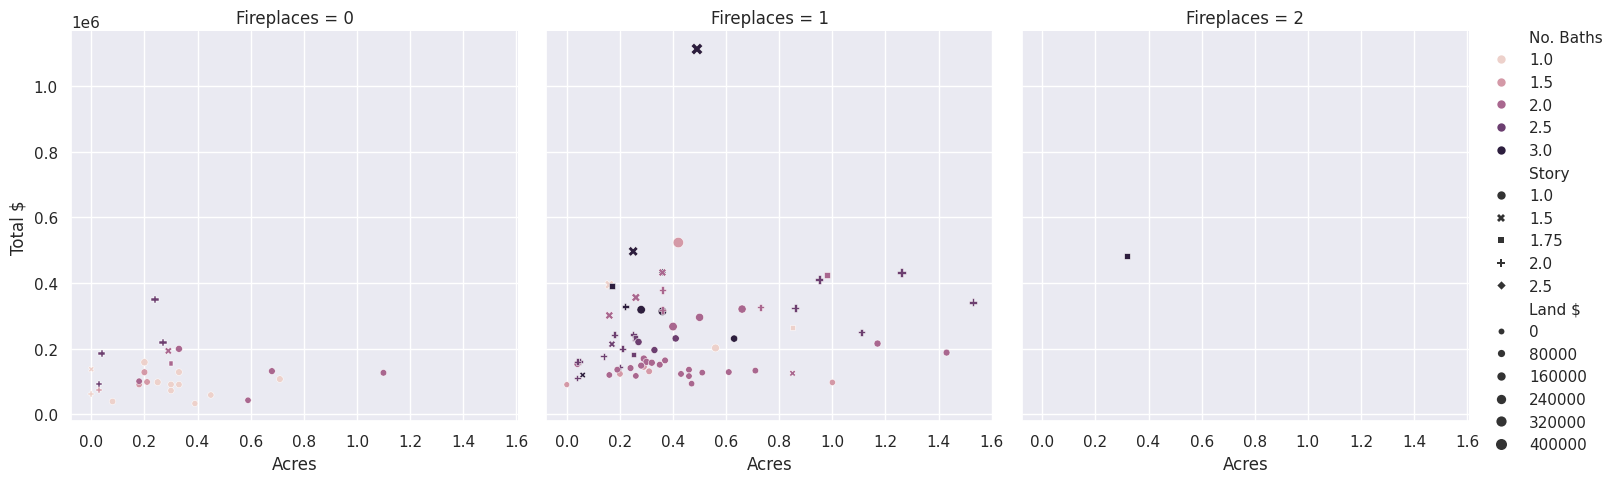

In [57]:
# Now try to add more visual features to your plot using "hue", "size", "style", and "col" within 
# the argument of sns.relplot() function. 
# There is no unique correct answer for this problen. Goal is to produce good informative plots. 
sns.relplot(data = nc_df, x = "Acres", y = "Total $", col = "Fireplaces", size = "Land $",
            hue = "No. Baths", style = "Story" );






## The `sns.displot()` function. 

Analyzing one Quantitative variable via sns.displot() function. 

### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


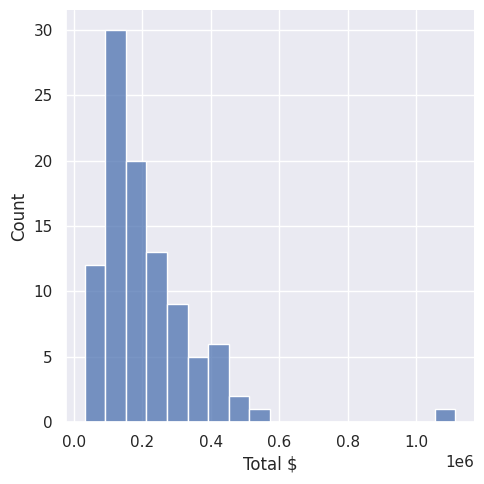

In [58]:
# Plot a Histogram for total property price "Total $" using sns.displot() function. 
sns.displot(data = nc_df, 
            x="Total $",
            #hue = "No. Baths",
            kind="hist");    






# Easier than using plt.hist() function? 
# Answer: 
# One can easily add more features to the Histogram below using sns.displot() then using plt.hist(). 

## The `sns.catplot()` function

Analyzing one Quantitative variable with respect one or more categorical variables. 

### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


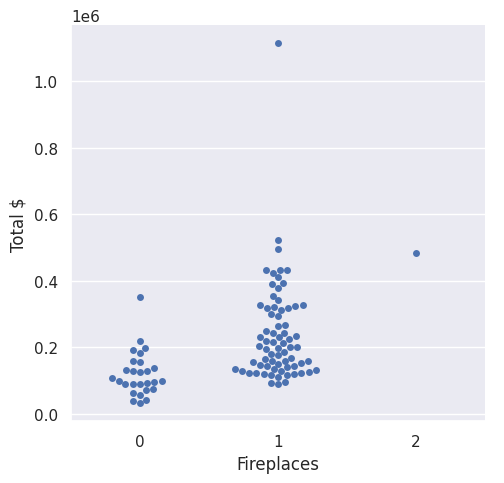

In [59]:
# Plot Total property price as the function of number of fireplaces using different kinds of plots.
# Choose from: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”.
sns.catplot(data = nc_df, 
            x = "Fireplaces", 
            y = "Total $", 
            kind = "swarm");






<br>
<br>
<br>

# 6. Take Home Problem: ***Data "(Mis-)" Visualization***

While data visualization is an excellent medium for scientific data communication among the mass population, one also needs be careful and understand how data visualization can be weaponized to manipulate human perception. 

***A very talked-about graph created by Reuters which took the readers on a convoluted path, leaving them bewildered and struggling to comprehend the intended message is the one shown below.***

In [60]:
# import image module
from IPython.display import Image

# get the image
Image(url="florida_guns_death.jpg", width=600, height=600)

<br>
<br>

1. Can you tell what is wrong with the graph above?

Answer: At first glance, it feels as if the graph is trying to say that the number of gun deaths dropped hugely from 2005 after Florida enacted its ‘stand your ground’ law. This is because our eyes are used to see the y-axis starting from zero at the bottom of the graph. But, the actual information is exactly the opposite, gun deaths increased from approximately 550 to 850 from 2005 to 2007! If we look carefully, the y-axis of the graph is labeled upside down with a red area fill to create a dramatic bloody effect. The creator probably aimed for an artistic impact rather than trickery, it did lead many folks to believe that Florida became safer after the law came into effect. 

<br>
<br>
<br>

***Now look at the graph below created by Fox News showcasing changes in the unemployment rate during Obama’s presidency.***

In [61]:
# import image module
from IPython.display import Image

# get the image
Image(url="unemployment-chart-by-fox-news.jpg", width=700, height=700)

<br>
<br>

2. Can you tell what is wrong with the graph above?

Answer: The y-axis does not start at zero, distorting the perception of the rate drop. Additionally, the value for November is inaccurately represented. The corrected graph reveals a clear decline from 9.0% to 8.6%.